<a href="https://colab.research.google.com/github/Sanket-Ghosh/Breast_Cancer_Prediction-/blob/main/Rape_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSERTING LIBRARIES

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

#Configuring Matplotlib as inline output

%matplotlib inline

**EXPLORING DATASET**

In [3]:
#Reading Dataset

rape_victims = pd.read_csv('/content/20_Victims_of_rape.csv')

#showing Data
rape_victims.head()


,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
#Cleaning the data 

rape_victims = rape_victims[rape_victims['Subgroup'] != 'Total Rape Victims']

# let's check if the all the rape cases are reported

rape_victims[rape_victims['Victims_of_Rape_Total'] != rape_victims['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


Storing Unreported Cases in Another Column

In [5]:
rape_victims['Unreported_Cases'] = rape_victims['Victims_of_Rape_Total'] - rape_victims['Rape_Cases_Reported']

#New dataframe after adding the unreported section

rape_victims[rape_victims['Unreported_Cases'] > 0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


**Visulaizing the Dataset**

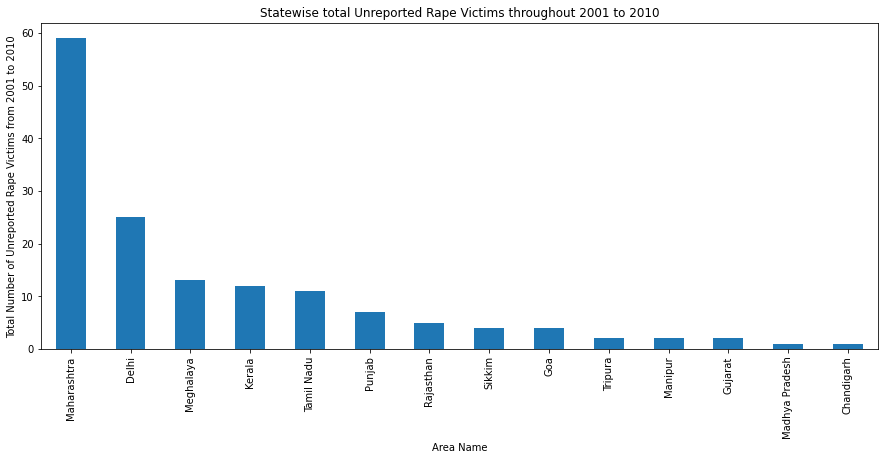

In [10]:
#Plotting the unreported cases sorted by states from year 2001 - 2010

unreported_victims_by_state = rape_victims.groupby('Area_Name').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)


#Plotting in graph

plt.subplots(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported_Cases'] > 0]['Unreported_Cases'].sort_values(ascending = False)

ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()


From this we can see Maharashtra has the most number of cases

In [13]:
#Taking some data and plotting in chart

rape_victims_by_state = rape_victims.groupby('Area_Name').sum()
rape_victims_by_state.drop('Year', axis = 1, inplace = True)

#Printing total number of cases

print('Total Rape Victims = ', rape_victims_by_state['Rape_Cases_Reported'].sum())

#Showing the number of reported cases

rape_victims_by_state.sort_values(by = 'Rape_Cases_Reported', ascending = False).head()

Total Rape Victims =  190008


,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
West Bengal,16378,10,156,273,12586,3290,16378,63,0
Uttar Pradesh,15053,12,1424,3092,8076,2086,15053,363,0
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Assam,12762,95,153,409,8507,3552,12762,46,0


**TOTAL NUMBER OF RAPE CASES REPORTED STATE-WISE Showing in Graph**

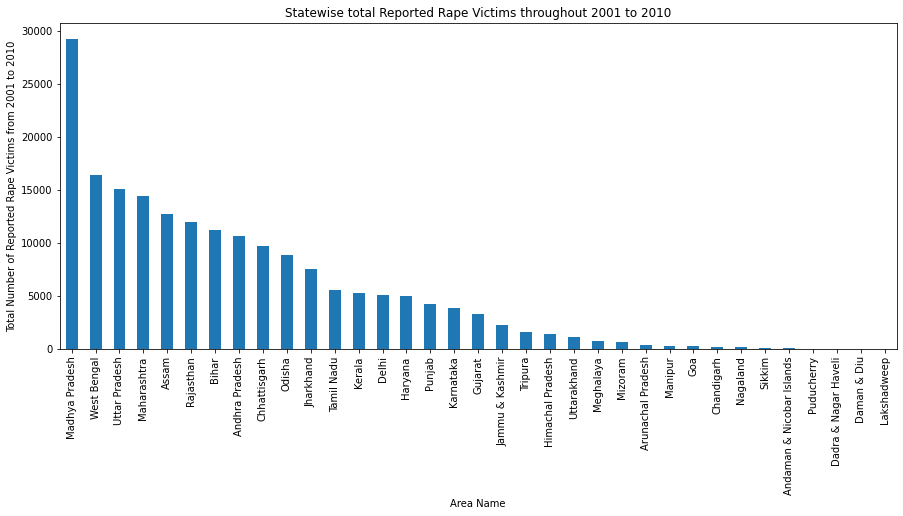

Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                     227
Nagaland  

In [17]:
#Plotting the total number of cases in graph

plt.subplots(figsize = (15, 6))
ct = rape_victims_by_state[rape_victims_by_state['Rape_Cases_Reported'] > 0]['Rape_Cases_Reported'].sort_values(ascending = False)

ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throughout 2001 to 2010')
plt.show()
print(ct)

**Categorizing Victims with the age-group with a heat map**

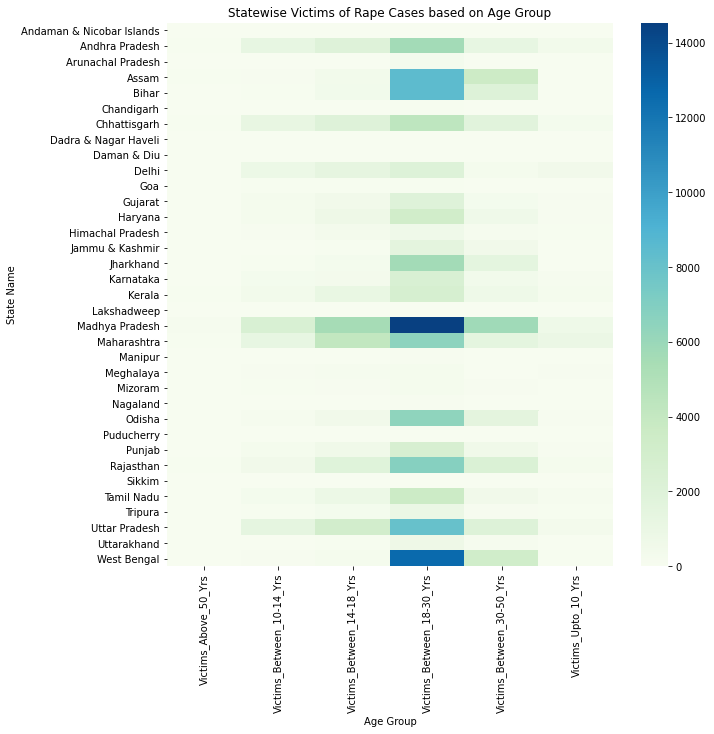

In [34]:
#creating heatmap variables

rape_victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported','Victims_of_Rape_Total','Unreported_Cases'], axis = 1)
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="GnBu")
ax.set_xlabel('Age Group')
ax.set_ylabel('State Name')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()

# Madhya Pradesh

In [35]:
#EDA for the state having most cases

mp_rape_victims = rape_victims[rape_victims['Area_Name'] == 'Madhya Pradesh']

# let's have a look in the data
mp_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10,0
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76,0
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3,0
575,Madhya Pradesh,2002,Victims of Other Rape,2819,13,174,236,1512,807,2819,77,0
577,Madhya Pradesh,2003,Victims of Incest Rape,123,0,10,23,71,16,123,3,0


**Yearly Cases Plotted in Graph**


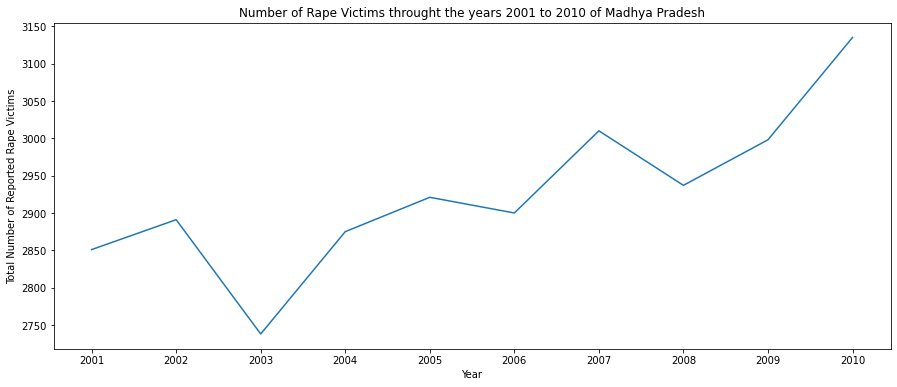

In [38]:
#Yearly Distribution of victims

mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

#print(mp_rape_victims_by_year)

#plotting the data

plt.subplots(figsize = (15, 6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',title = 'Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()


**Yearly Distribution of Number of Incest Rape Victims in Madhya Pradesh**

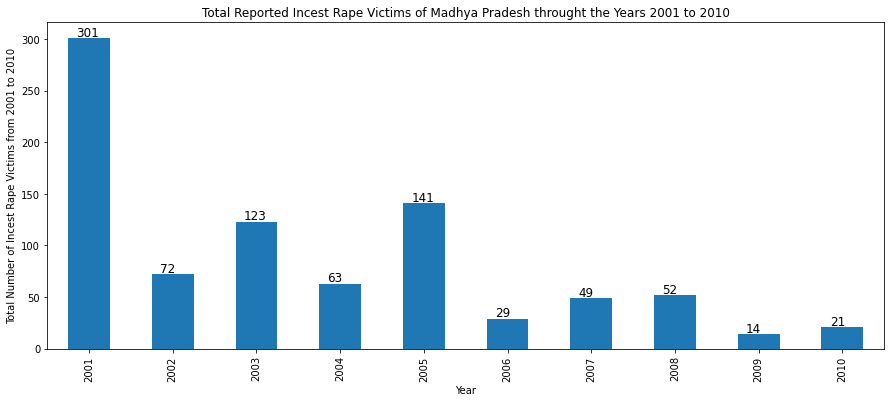

In [40]:
# plot the dataframe
mp_incest_rape_cases = mp_rape_victims[mp_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = mp_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of Madhya Pradesh throught the Years 2001 to 2010')
plt.show()

# West Bengal

In [42]:
#EDA for home state 

wb_rape_victims = rape_victims[rape_victims['Area_Name'] == 'West Bengal']

# let's have a look in the data
wb_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
1021,West Bengal,2001,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
1022,West Bengal,2001,Victims of Other Rape,709,0,3,5,594,103,709,4,0
1024,West Bengal,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
1025,West Bengal,2002,Victims of Other Rape,759,0,3,8,552,191,759,5,0
1027,West Bengal,2003,Victims of Incest Rape,15,0,2,0,12,0,15,1,0


**Yearly Cases Plotted in Graph**

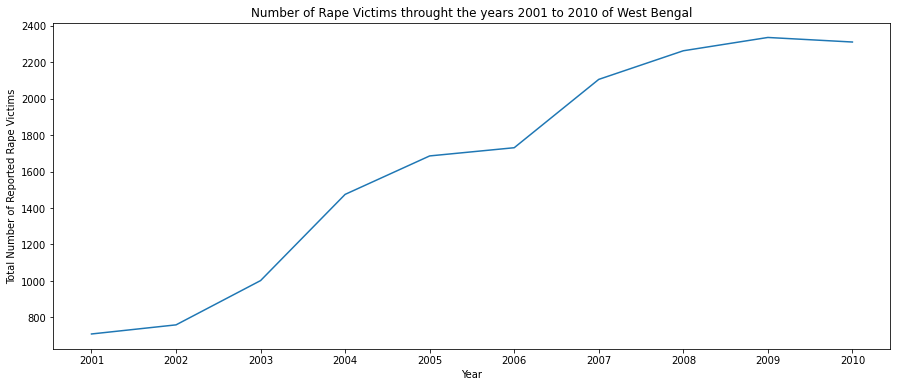

In [44]:
#Yearly Distribution of victims

wb_rape_victims_by_year = wb_rape_victims.groupby('Year').sum()

#print(wb_rape_victims_by_year)

#plotting the data

plt.subplots(figsize = (15, 6))
ax = wb_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',title = 'Number of Rape Victims throught the years 2001 to 2010 of West Bengal')
plt.show()




**Yearly Distribution of Number of Incest Rape Victims in West Bengal**

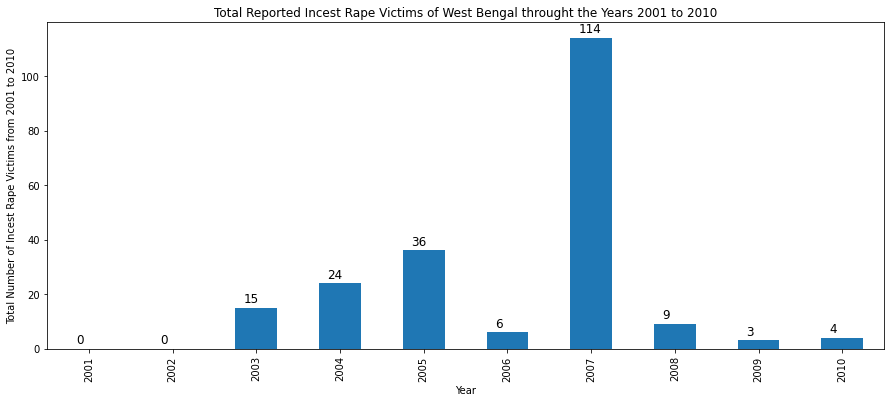

In [46]:
wb_incest_rape_cases = wb_rape_victims[wb_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = wb_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of West Bengal throught the Years 2001 to 2010')
plt.show()

**COMPARISON BETWEEN TWO MAJOR STATES IN INDIA**

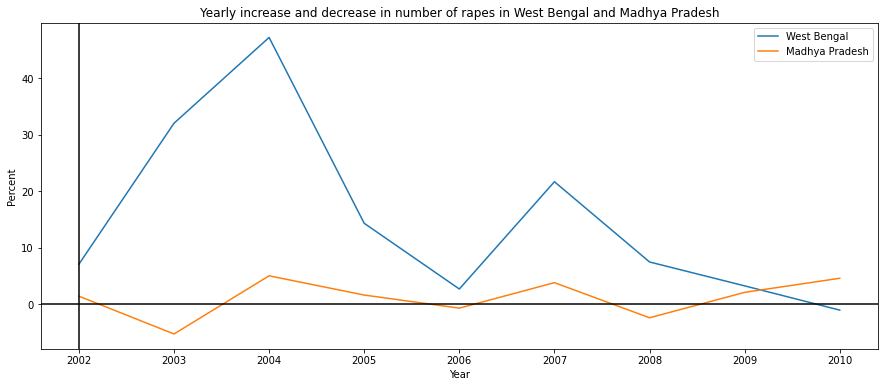

Overall Increase in number of rapes in West Bengal = 69.32 Percent
Overall Increase in number of rapes in Madhya Pradesh = 12.29 Percent


In [47]:
# calculating the percentage increase of number of rapes in West Bengal and MP and Comparing
plt.subplots(figsize = (15, 6))
ax = (wb_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True,label = 'West Bengal')
(mp_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, label = 'Madhya Pradesh')

ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in West Bengal and Madhya Pradesh')
ax.axhline(0, color = 'black')
ax.axvline(2002, color = 'black')
plt.show()

print('Overall Increase in number of rapes in West Bengal =', 
      '{0:.2f}'.format(((wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] - wb_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])/wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((mp_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - mp_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')